In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
test = pd.read_csv('./data_test.csv')

In [3]:
train = pd.read_csv('./data_train.csv')

In [4]:
train

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0
...,...,...,...,...,...
831648,831648,3812226,2.0,1546203600,0.0
831649,831649,2480469,2.0,1546203600,0.0
831650,831650,158236,2.0,1546203600,0.0
831651,831651,1825525,2.0,1546203600,0.0


In [5]:
test

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400
...,...,...,...,...
71226,71226,2502453,5.0,1548018000
71227,71227,1693213,2.0,1548018000
71228,71228,1891350,2.0,1548018000
71229,71229,2437172,2.0,1548018000


In [6]:
train['id'].nunique()

806613

In [7]:
features = dd.read_csv('features.csv', blocksize=25e6, sep='\t')

In [8]:
features_train = features.loc[features['id'].isin(train['id'])].compute()

In [9]:
features_test = features.loc[features['id'].isin(test['id'])].compute()

In [10]:
features_train.duplicated().sum()

0

In [11]:
features_train.shape[0]

834168

In [12]:
features_train['id'].nunique()

806613

In [13]:
dif = features_train.shape[0] - features_train['id'].nunique()
dif

27555

In [14]:
features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
3476,3664458,372,1544389200,159.560029,-100.259112,146.889214,-110.936798,141.471754,-132.04179,-16.08618,...,4405.626154,1933.229208,-25.996269,-37.630448,29.252276,-22.832889,-0.694428,-12.175933,-0.45614,0.0
893,982668,372,1544994000,-96.799971,-143.929112,-109.050786,-174.096798,-114.468246,-195.20179,-16.08618,...,-835.373846,-471.770792,-25.996269,-37.630448,-290.747724,-22.832889,-0.694428,-12.175933,-0.45614,0.0
3156,914805,404,1533502800,-78.159971,499.180888,-84.480786,460.553202,-89.898246,439.44821,-16.08618,...,-408.373846,-588.770792,-25.996269,-22.630448,861.252276,34.167111,-0.694428,47.824067,-0.45614,0.0
4910,3600789,404,1540155600,354.550029,164.940888,526.199214,327.583202,520.781754,306.47821,403.40382,...,2712.626154,1326.229208,-24.996269,102.369552,201.252276,30.167111,-0.694428,-10.175933,-0.45614,0.0
784,2890548,487,1544389200,-28.169971,-30.359112,119.749214,417.873202,114.331754,396.76821,-16.08618,...,-973.373846,-613.770792,-25.996269,-9.630448,11.252276,45.167111,0.305572,-12.175933,2.54386,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,4386322,4362012,1533502800,12.950029,-94.609112,0.699214,-133.656798,-4.718246,-154.76179,-16.08618,...,-931.373846,-604.770792,-23.996269,-37.630448,-143.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
943,3261297,4362200,1535317200,199.810029,-94.879112,185.869214,-147.486798,180.451754,-168.59179,-16.08618,...,-722.373846,-360.770792,-25.996269,-37.630448,72.252276,31.167111,1.305572,42.824067,-0.45614,0.0
4006,3419602,4362200,1542574800,-96.799971,-196.319112,-110.740786,-248.926798,-116.158246,-270.03179,-16.08618,...,-963.373846,-599.770792,-22.996269,-35.630448,-192.747724,-21.832889,0.305572,-12.175933,-0.45614,0.0
2276,272785,4362538,1542574800,-96.799971,-160.309112,-72.610786,-170.546798,-78.028246,-191.65179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [15]:
dublicated = features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()

In [16]:
dublicated = features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()

In [17]:
train['id'].shape[0]

831653

In [18]:
train['id'].nunique()

806613

In [19]:
diff = train['id'].shape[0] - train['id'].nunique()

In [20]:
diff

25040

In [21]:
train[train['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,vas_id,buy_time,target
14042,14042,342,2.0,1542574800,1.0
14041,14041,342,1.0,1541365200,0.0
19825,19825,492,6.0,1544994000,1.0
19824,19824,492,4.0,1538946000,0.0
22908,22908,579,4.0,1542574800,1.0
...,...,...,...,...,...
751154,751154,4339012,2.0,1542574800,1.0
248700,248700,4347691,4.0,1543179600,0.0
248701,248701,4347691,6.0,1542574800,1.0
366175,366175,4350615,2.0,1544389200,1.0


In [22]:
a = features_train.loc[features_train['id']==372]

In [23]:
b = train.loc[train['id']==372]

In [24]:
a

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
893,982668,372,1544994000,-96.799971,-143.929112,-109.050786,-174.096798,-114.468246,-195.20179,-16.08618,...,-835.373846,-471.770792,-25.996269,-37.630448,-290.747724,-22.832889,-0.694428,-12.175933,-0.45614,0.0
3476,3664458,372,1544389200,159.560029,-100.259112,146.889214,-110.936798,141.471754,-132.04179,-16.08618,...,4405.626154,1933.229208,-25.996269,-37.630448,29.252276,-22.832889,-0.694428,-12.175933,-0.45614,0.0


In [25]:
a = a.sort_values(by='buy_time')

In [26]:
b

,Unnamed: 0,id,vas_id,buy_time,target
15681,15681,372,4.0,1535922000,0.0


In [27]:
c = pd.merge_asof(b, a, on='buy_time', by='id')

In [28]:
c

,Unnamed: 0_x,id,vas_id,buy_time,target,Unnamed: 0_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,15681,372,4.0,1535922000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
c = pd.merge(b, a, on='id')
c

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,15681,372,4.0,1535922000,0.0,3664458,1544389200,159.560029,-100.259112,146.889214,...,4405.626154,1933.229208,-25.996269,-37.630448,29.252276,-22.832889,-0.694428,-12.175933,-0.45614,0.0
1,15681,372,4.0,1535922000,0.0,982668,1544994000,-96.799971,-143.929112,-109.050786,...,-835.373846,-471.770792,-25.996269,-37.630448,-290.747724,-22.832889,-0.694428,-12.175933,-0.45614,0.0


In [30]:
train = pd.merge(train, features_train, on='id')

In [31]:
train

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,3756522,1541970000,-31.559971,327.360888,-45.500786,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,2735973,1531083600,547.270029,238.430888,533.329214,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,3586550,1543179600,-92.139971,-95.469112,-106.080786,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,1634974,1533502800,54.880029,12.970888,54.079214,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,716515,1543179600,45.160029,295.240888,64.679214,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860047,831648,3812226,2.0,1546203600,0.0,3598646,1532898000,29.750029,6.200888,24.279214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
860048,831649,2480469,2.0,1546203600,0.0,1126545,1532293200,-89.179971,-56.499112,-103.120786,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
860049,831650,158236,2.0,1546203600,0.0,3755060,1538946000,-96.799971,62.140888,-110.740786,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
860050,831651,1825525,2.0,1546203600,0.0,253884,1533502800,-96.799971,-81.919112,-110.740786,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [32]:
train['1'].isnull().sum()

0

In [33]:
tmp = train.loc[train['id'].isin(dublicated.index)]

In [34]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
8,8,2000856,1.0,1534712400,0.0,2114914,1531688400,-21.369971,108.780888,178.619214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
9,8,2000856,1.0,1534712400,0.0,4145047,1531083600,-92.559971,48.600888,50.239214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
58,57,3577738,1.0,1532293200,0.0,2986290,1540760400,-96.799971,45.210888,-104.810786,...,-929.373846,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
59,57,3577738,1.0,1532293200,0.0,3235297,1537736400,-96.799971,104.530888,-8.220786,...,-969.373846,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
63,61,203194,1.0,1532293200,0.0,146332,1542574800,-96.799971,-111.569112,-110.740786,...,-977.373846,-613.770792,-25.996269,-37.630448,-258.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859986,831589,2524068,2.0,1546203600,0.0,3070401,1546203600,21.700029,121.340888,7.759214,...,63574.626154,-584.770792,-25.996269,-31.630448,-237.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
860000,831603,3897343,2.0,1546203600,0.0,2512976,1544994000,-96.799971,-408.179112,-110.740786,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
860001,831603,3897343,2.0,1546203600,0.0,4384546,1532293200,-61.909971,-212.729112,-75.850786,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
860029,831631,3431643,5.0,1546203600,0.0,995025,1547413200,-95.299971,-248.349112,-109.240786,...,-642.373846,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [35]:
tmp['delta'] = abs(tmp['buy_time_x'] - tmp['buy_time_y'])

/tmp/ipykernel_95642/142592273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['delta'] = abs(tmp['buy_time_x'] - tmp['buy_time_y'])


In [36]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,244,245,246,247,248,249,250,251,252,delta
8,8,2000856,1.0,1534712400,0.0,2114914,1531688400,-21.369971,108.780888,178.619214,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,3024000
9,8,2000856,1.0,1534712400,0.0,4145047,1531083600,-92.559971,48.600888,50.239214,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,3628800
58,57,3577738,1.0,1532293200,0.0,2986290,1540760400,-96.799971,45.210888,-104.810786,...,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
59,57,3577738,1.0,1532293200,0.0,3235297,1537736400,-96.799971,104.530888,-8.220786,...,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,5443200
63,61,203194,1.0,1532293200,0.0,146332,1542574800,-96.799971,-111.569112,-110.740786,...,-613.770792,-25.996269,-37.630448,-258.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0,10281600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859986,831589,2524068,2.0,1546203600,0.0,3070401,1546203600,21.700029,121.340888,7.759214,...,-584.770792,-25.996269,-31.630448,-237.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0,0
860000,831603,3897343,2.0,1546203600,0.0,2512976,1544994000,-96.799971,-408.179112,-110.740786,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600
860001,831603,3897343,2.0,1546203600,0.0,4384546,1532293200,-61.909971,-212.729112,-75.850786,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,13910400
860029,831631,3431643,5.0,1546203600,0.0,995025,1547413200,-95.299971,-248.349112,-109.240786,...,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600


In [37]:
tmp.sort_values(by = ['Unnamed: 0_x', 'delta'], inplace=True)

/home/vol4ok/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
tmp['Unnamed: 0_x'].value_counts()

8         2
554715    2
554996    2
554992    2
554930    2
         ..
279275    2
279223    2
279196    2
279186    2
831631    2
Name: Unnamed: 0_x, Length: 28399, dtype: int64

In [41]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,244,245,246,247,248,249,250,251,252,delta
8,8,2000856,1.0,1534712400,0.0,2114914,1531688400,-21.369971,108.780888,178.619214,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,3024000
9,8,2000856,1.0,1534712400,0.0,4145047,1531083600,-92.559971,48.600888,50.239214,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,3628800
59,57,3577738,1.0,1532293200,0.0,3235297,1537736400,-96.799971,104.530888,-8.220786,...,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,5443200
58,57,3577738,1.0,1532293200,0.0,2986290,1540760400,-96.799971,45.210888,-104.810786,...,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
64,61,203194,1.0,1532293200,0.0,2041758,1540760400,-96.799971,-170.889112,-110.740786,...,-613.770792,-25.996269,-37.630448,-297.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859985,831589,2524068,2.0,1546203600,0.0,1537855,1540760400,-79.839971,-9.859112,-93.780786,...,-613.770792,-25.996269,-37.630448,-300.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,5443200
860000,831603,3897343,2.0,1546203600,0.0,2512976,1544994000,-96.799971,-408.179112,-110.740786,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600
860001,831603,3897343,2.0,1546203600,0.0,4384546,1532293200,-61.909971,-212.729112,-75.850786,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,13910400
860029,831631,3431643,5.0,1546203600,0.0,995025,1547413200,-95.299971,-248.349112,-109.240786,...,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600


In [39]:
del_idx = tmp['Unnamed: 0_x'].duplicated()

In [40]:
del_idx

8         False
9          True
59        False
58         True
64        False
          ...  
859985     True
860000    False
860001     True
860029    False
860030     True
Name: Unnamed: 0_x, Length: 56798, dtype: bool

In [42]:
del_idx = del_idx[del_idx.values == True]

In [43]:
del_idx

9         True
58        True
63        True
65        True
86        True
          ... 
859892    True
859895    True
859985    True
860001    True
860030    True
Name: Unnamed: 0_x, Length: 28399, dtype: bool

In [44]:
train.drop(del_idx.index, axis=0, inplace=True)

In [45]:
train

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,3756522,1541970000,-31.559971,327.360888,-45.500786,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,2735973,1531083600,547.270029,238.430888,533.329214,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,3586550,1543179600,-92.139971,-95.469112,-106.080786,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,1634974,1533502800,54.880029,12.970888,54.079214,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,716515,1543179600,45.160029,295.240888,64.679214,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860047,831648,3812226,2.0,1546203600,0.0,3598646,1532898000,29.750029,6.200888,24.279214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
860048,831649,2480469,2.0,1546203600,0.0,1126545,1532293200,-89.179971,-56.499112,-103.120786,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
860049,831650,158236,2.0,1546203600,0.0,3755060,1538946000,-96.799971,62.140888,-110.740786,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
860050,831651,1825525,2.0,1546203600,0.0,253884,1533502800,-96.799971,-81.919112,-110.740786,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [46]:
train.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'], axis=1, inplace=True)

In [47]:
train

,id,vas_id,buy_time_x,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,323.17821,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860047,3812226,2.0,1546203600,0.0,29.750029,6.200888,24.279214,-37.936798,18.861754,-59.04179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
860048,2480469,2.0,1546203600,0.0,-89.179971,-56.499112,-103.120786,-109.106798,-108.538246,-130.21179,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
860049,158236,2.0,1546203600,0.0,-96.799971,62.140888,-110.740786,9.533202,-116.158246,-11.57179,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
860050,1825525,2.0,1546203600,0.0,-96.799971,-81.919112,-110.740786,-128.596798,-116.158246,-76.82179,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [48]:
features_test.duplicated().sum()


0

In [49]:
dif = features_test.shape[0] - features_test['id'].nunique()
dif

2400

In [50]:
features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
4741,9755,1544,1535317200,56.090029,46.140888,126.899214,78.283202,121.481754,57.17821,-16.08618,...,-974.373846,-613.770792,-23.996269,-37.630448,-179.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
2444,1995811,1544,1546203600,68.940029,11.930888,182.759214,415.013202,177.341754,393.90821,-16.08618,...,-883.373846,-541.770792,-22.996269,-37.630448,68.252276,-4.832889,-0.694428,-12.175933,-0.45614,1.0
4071,2167703,4279,1545598800,-34.499971,-142.449112,-45.900786,-192.516798,-51.318246,-213.62179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3581,4265509,4279,1546203600,-35.399971,-143.349112,-49.340786,-193.416798,-54.758246,-214.52179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4923,340551,10021,1546808400,-85.109971,-384.779112,-77.400786,-398.196798,-82.818246,-419.30179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1109634,4361372,1534712400,-96.799971,-170.889112,-110.740786,-223.496798,-116.158246,-244.60179,-16.08618,...,-791.373846,-519.770792,-25.996269,-36.630448,-146.747724,-6.832889,-0.694428,6.824067,-0.45614,0.0
662,236110,4361999,1542574800,411.670029,107.920888,427.389214,84.973202,423.501754,66.92821,-16.08618,...,612.626154,616.229208,23.003731,79.369552,622.252276,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4239,4025788,4361999,1544389200,-96.799971,100.290888,-110.740786,77.343202,-116.158246,62.35821,-16.08618,...,857.626154,922.229208,108.003731,47.369552,-143.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4507,2989424,4362664,1546203600,-95.109971,-403.089112,-109.050786,-455.696798,-114.468246,-476.80179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [53]:
dublicated = features_tedublicated = features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()

In [54]:
dublicated

1544       2
2859864    2
2864284    2
2865984    2
2867564    2
          ..
1338449    2
1341932    2
1342757    2
1349463    2
4362664    2
Name: id, Length: 2400, dtype: int64

In [55]:
diff = test['id'].shape[0] - test['id'].nunique()

In [56]:


diff



1079

In [57]:
test[test['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,vas_id,buy_time
552,552,274,4.0,1548018000
551,551,274,2.0,1547413200
10677,10677,4770,4.0,1547413200
10676,10676,4770,2.0,1548018000
20241,20241,8166,1.0,1546808400
...,...,...,...,...
47995,47995,4231949,2.0,1546808400
69800,69800,4256618,2.0,1546808400
69801,69801,4256618,6.0,1548018000
17218,17218,4348306,4.0,1546808400


In [58]:
features_test

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
141,141,2522732,1539550800,-93.749971,-64.949112,-99.210786,-100.596798,-104.628246,-103.92179,-16.08618,...,-977.373846,-613.770792,-17.996269,-36.630448,-212.747724,2.167111,-0.694428,-12.175933,-0.45614,1.0
274,274,3504271,1548018000,386.530029,75.150888,372.589214,39.133202,367.171754,18.02821,-16.08618,...,-909.373846,-545.770792,-25.996269,-37.630448,-231.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
300,300,3556316,1539550800,-96.799971,-183.599112,-110.740786,-236.206798,-116.158246,-257.31179,-16.08618,...,-898.373846,-534.770792,-25.996269,-37.630448,-47.747724,-22.832889,0.305572,-11.175933,-0.45614,0.0
324,324,3578987,1532898000,81.140029,32.440888,70.589214,-13.386798,65.171754,-34.49179,-16.08618,...,-6.373846,-578.770792,-25.996269,-37.630448,-111.747724,41.167111,-0.694428,54.824067,-0.45614,0.0
399,399,3662585,1533502800,-96.799971,-372.579112,-110.740786,-425.186798,-116.158246,-446.29179,-16.08618,...,-411.373846,-607.770792,-25.996269,-29.630448,-255.747724,-22.832889,-0.694428,-9.175933,-0.45614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4512390,3488214,1545598800,157.440029,712.940888,143.499214,660.333202,138.081754,639.22821,-16.08618,...,75.626154,384.229208,-25.996269,-37.630448,-192.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
118,4512433,3495222,1545598800,-93.409971,-281.909112,-103.110786,-330.276798,-108.528246,-351.38179,-12.69618,...,10658.626154,9726.229208,-25.996269,-28.630448,808.252276,-18.832889,-0.694428,-12.175933,-0.45614,0.0
121,4512436,3495970,1547413200,-12.239971,-72.559112,-26.180786,-120.926798,-31.598246,-142.03179,-16.08618,...,-966.373846,-602.770792,-25.996269,-37.630448,-211.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
148,4512463,3505955,1548018000,-96.799971,50.150888,-110.740786,1.713202,-116.158246,-19.39179,-16.08618,...,748.626154,1054.229208,716.003731,-37.630448,1208.252276,-24.832889,-0.694428,-12.175933,-0.45614,1.0


In [59]:
test

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400
...,...,...,...,...
71226,71226,2502453,5.0,1548018000
71227,71227,1693213,2.0,1548018000
71228,71228,1891350,2.0,1548018000
71229,71229,2437172,2.0,1548018000


In [60]:
test = pd.merge(test, features_test, on='id')

In [61]:
test

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,1871362,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,2024591,1532293200,-96.799971,100.290888,-110.740786,140.903202,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,4041332,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,1945062,1536526800,259.130029,-52.249112,245.189214,-104.856798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,3503668,1532293200,331.170029,590.890888,317.229214,538.283202,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73661,71226,2502453,5.0,1548018000,820229,1534712400,-96.799971,-408.179112,-110.740786,-460.786798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73662,71227,1693213,2.0,1548018000,3872196,1541970000,-89.689971,-355.809112,-103.630786,-408.416798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73663,71228,1891350,2.0,1548018000,3188331,1545598800,-96.799971,-281.059112,-110.740786,-333.666798,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
73664,71229,2437172,2.0,1548018000,1510984,1532293200,115.060029,-87.339112,101.119214,-127.236798,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [62]:
test.isnull().sum()

Unnamed: 0_x    0
id              0
vas_id          0
buy_time_x      0
Unnamed: 0_y    0
               ..
248             0
249             0
250             0
251             0
252             0
Length: 259, dtype: int64

In [63]:
tmp = test.loc[test['id'].isin(dublicated.index)]

In [64]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
118,118,1759413,6.0,1547413200,1010540,1540155600,-96.799971,-408.179112,-110.740786,-460.786798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
119,118,1759413,6.0,1547413200,4211678,1531688400,-95.949971,-368.439112,-109.890786,-421.046798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
123,122,2502506,2.0,1547413200,254525,1543179600,-96.799971,-270.469112,-110.740786,-323.076798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
124,122,2502506,2.0,1547413200,2465416,1535317200,184.510029,-93.569112,170.569214,61.443202,...,-715.373846,-351.770792,-25.996269,-37.630448,-222.747724,-16.832889,-0.694428,-3.175933,-0.45614,0.0
139,137,3130584,2.0,1546808400,571842,1532898000,-96.799971,-103.099112,-110.740786,-92.146798,...,-876.373846,-587.770792,-24.996269,-36.630448,-203.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73608,71175,653078,5.0,1548018000,3195752,1541970000,90.320029,-77.609112,76.379214,-130.216798,...,-775.373846,-596.770792,-3.996269,-36.630448,-58.747724,-13.832889,-0.694428,-11.175933,-0.45614,0.0
73610,71177,4088260,2.0,1548018000,2355956,1531688400,136.970029,-99.199112,127.269214,-142.486798,...,-977.373846,-613.770792,-25.996269,-37.630448,-298.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73611,71177,4088260,2.0,1548018000,3169222,1534712400,-26.269971,148.080888,-40.210786,133.613202,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73638,71204,248256,5.0,1548018000,1829273,1544389200,221.000029,-65.959112,207.059214,-118.566798,...,850.626154,-12.770792,-17.996269,-37.630448,-212.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0


In [65]:
tmp['delta'] = abs(tmp['buy_time_x'] - tmp['buy_time_y'])

/tmp/ipykernel_95642/142592273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['delta'] = abs(tmp['buy_time_x'] - tmp['buy_time_y'])


In [66]:
tmp.sort_values(by = ['Unnamed: 0_x', 'delta'], inplace=True)

/home/vol4ok/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [67]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,244,245,246,247,248,249,250,251,252,delta
118,118,1759413,6.0,1547413200,1010540,1540155600,-96.799971,-408.179112,-110.740786,-460.786798,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,7257600
119,118,1759413,6.0,1547413200,4211678,1531688400,-95.949971,-368.439112,-109.890786,-421.046798,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,15724800
123,122,2502506,2.0,1547413200,254525,1543179600,-96.799971,-270.469112,-110.740786,-323.076798,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,4233600
124,122,2502506,2.0,1547413200,2465416,1535317200,184.510029,-93.569112,170.569214,61.443202,...,-351.770792,-25.996269,-37.630448,-222.747724,-16.832889,-0.694428,-3.175933,-0.45614,0.0,12096000
139,137,3130584,2.0,1546808400,571842,1532898000,-96.799971,-103.099112,-110.740786,-92.146798,...,-587.770792,-24.996269,-36.630448,-203.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0,13910400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73608,71175,653078,5.0,1548018000,3195752,1541970000,90.320029,-77.609112,76.379214,-130.216798,...,-596.770792,-3.996269,-36.630448,-58.747724,-13.832889,-0.694428,-11.175933,-0.45614,0.0,6048000
73611,71177,4088260,2.0,1548018000,3169222,1534712400,-26.269971,148.080888,-40.210786,133.613202,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,13305600
73610,71177,4088260,2.0,1548018000,2355956,1531688400,136.970029,-99.199112,127.269214,-142.486798,...,-613.770792,-25.996269,-37.630448,-298.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,16329600
73638,71204,248256,5.0,1548018000,1829273,1544389200,221.000029,-65.959112,207.059214,-118.566798,...,-12.770792,-17.996269,-37.630448,-212.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,3628800


In [68]:
del_idx = tmp['Unnamed: 0_x'].duplicated()

In [69]:
del_idx = del_idx[del_idx.values == True]

In [70]:
del_idx

119      True
124      True
140      True
279      True
331      True
         ... 
73546    True
73558    True
73608    True
73610    True
73639    True
Name: Unnamed: 0_x, Length: 2435, dtype: bool

In [71]:
test.drop(del_idx.index, axis=0, inplace=True)

In [72]:
test

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,1871362,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,2024591,1532293200,-96.799971,100.290888,-110.740786,140.903202,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,4041332,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,1945062,1536526800,259.130029,-52.249112,245.189214,-104.856798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,3503668,1532293200,331.170029,590.890888,317.229214,538.283202,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73661,71226,2502453,5.0,1548018000,820229,1534712400,-96.799971,-408.179112,-110.740786,-460.786798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73662,71227,1693213,2.0,1548018000,3872196,1541970000,-89.689971,-355.809112,-103.630786,-408.416798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73663,71228,1891350,2.0,1548018000,3188331,1545598800,-96.799971,-281.059112,-110.740786,-333.666798,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
73664,71229,2437172,2.0,1548018000,1510984,1532293200,115.060029,-87.339112,101.119214,-127.236798,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [73]:
test.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'], axis=1, inplace=True)

In [74]:
test

,id,vas_id,buy_time_x,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,1277040,2.0,1546808400,331.170029,590.890888,317.229214,538.283202,311.811754,522.25821,-16.08618,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73661,2502453,5.0,1548018000,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73662,1693213,2.0,1548018000,-89.689971,-355.809112,-103.630786,-408.416798,-109.048246,-429.52179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
73663,1891350,2.0,1548018000,-96.799971,-281.059112,-110.740786,-333.666798,-116.158246,-354.77179,-16.08618,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
73664,2437172,2.0,1548018000,115.060029,-87.339112,101.119214,-127.236798,95.701754,-148.34179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [75]:
train.to_csv('train_new.csv')

In [76]:
test.to_csv('test_new.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv('train_new.csv')

In [4]:
X

,Unnamed: 0,id,vas_id,buy_time_x,target,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831648,860047,3812226,2.0,1546203600,0.0,29.750029,6.200888,24.279214,-37.936798,18.861754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
831649,860048,2480469,2.0,1546203600,0.0,-89.179971,-56.499112,-103.120786,-109.106798,-108.538246,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
831650,860049,158236,2.0,1546203600,0.0,-96.799971,62.140888,-110.740786,9.533202,-116.158246,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
831651,860050,1825525,2.0,1546203600,0.0,-96.799971,-81.919112,-110.740786,-128.596798,-116.158246,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [5]:
X_test = pd.read_csv('test_new.csv')

In [6]:
X_test

,Unnamed: 0,id,vas_id,buy_time_x,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,331.170029,590.890888,317.229214,538.283202,311.811754,522.25821,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71226,73661,2502453,5.0,1548018000,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71227,73662,1693213,2.0,1548018000,-89.689971,-355.809112,-103.630786,-408.416798,-109.048246,-429.52179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71228,73663,1891350,2.0,1548018000,-96.799971,-281.059112,-110.740786,-333.666798,-116.158246,-354.77179,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
71229,73664,2437172,2.0,1548018000,115.060029,-87.339112,101.119214,-127.236798,95.701754,-148.34179,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [7]:
y = X.target

In [8]:
X.drop(['Unnamed: 0', 'target'], axis=1, inplace=True)

In [9]:
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
X['vas_id'] = X['vas_id'].astype('int')

In [11]:
X_test['vas_id'] = X_test['vas_id'].astype('int')

<AxesSubplot:>

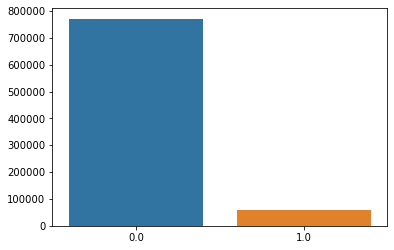

In [12]:
dis = y.value_counts()
sns.barplot(x=dis.index, y=dis.values)

In [13]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

train_idx, valid_idx = train_test_split(X.index, test_size=0.25, random_state=RANDOM_STATE)

y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]

print("Train")
print(y.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(y.loc[valid_idx].value_counts()/valid_idx.shape[0])

Train
0.0    0.927648
1.0    0.072352
Name: target, dtype: float64

Test
0.0    0.927581
1.0    0.072419
Name: target, dtype: float64


In [14]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

In [16]:
run_cv(log_reg, kfold_cv, X_train, y_train, model_name="Baseline")

Baseline: roc_auc = 0.56 (+/- 0.00)


In [17]:
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [18]:
log_reg_pred = log_reg.predict_proba(X_valid)[:,1]

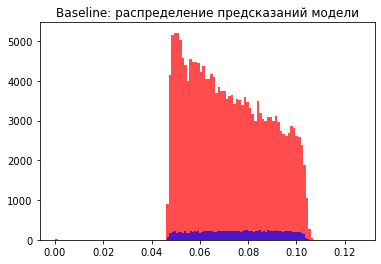

In [19]:
plt.title("Baseline: распределение предсказаний модели")
plt.hist(log_reg_pred[~y_valid.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(log_reg_pred[y_valid.astype(bool)], bins=100, color='b', alpha=0.7);

In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)

Baseline: AUC_ROC = 0.564


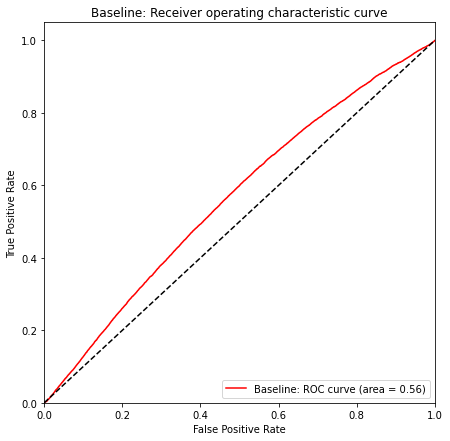

In [21]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))

Baseline: AUC_PR = 0.085


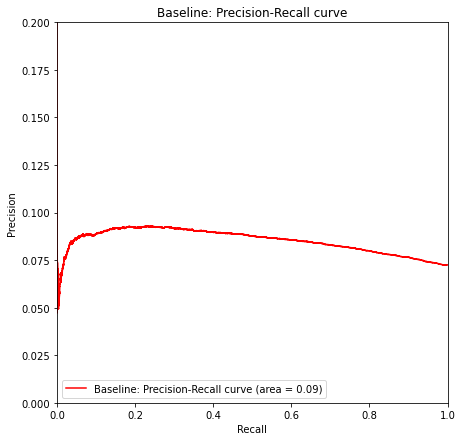

In [23]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 0.2])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[192857      0]
 [ 15057      0]]


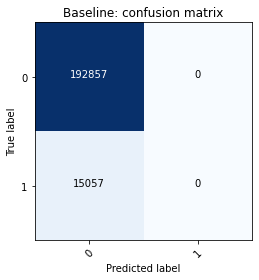

In [25]:
# TN                FP(Type I error)
# 
# FN(Type II error)  TP

cm = confusion_matrix(y_valid, log_reg_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pred > 0.5))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    192857
         1.0       0.00      0.00      0.00     15057

    accuracy                           0.93    207914
   macro avg       0.46      0.50      0.48    207914
weighted avg       0.86      0.93      0.89    207914



/home/vol4ok/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vol4ok/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vol4ok/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
X_nunique = X.nunique()

In [28]:
X_nunique

id            806613
vas_id             8
buy_time_x        26
0              46162
1             112909
               ...  
248             2342
249              265
250             1599
251              248
252               30
Length: 256, dtype: int64

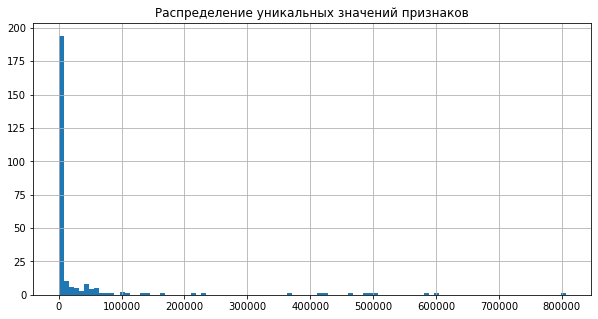

In [29]:
plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(10, 5));

In [30]:
f_all = set(X_nunique.index.tolist())
len(f_all)

256

In [31]:
f_const = set(X_nunique[X_nunique == 1].index.tolist())
len(f_const)

5

In [32]:
f_numeric = (X.fillna(0).astype(int).sum() - X.fillna(0).sum()).abs()
f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
len(f_numeric)

247

In [33]:
f_other = f_all - (f_numeric | f_const)
len(f_other)

4

In [34]:
f_binary = set(X.loc[:, f_other].columns[(
                      (X.loc[:, f_other].max() == 1) & \
                      (X.loc[:, f_other].min() == 0) & \
                      (X.loc[:, f_other].isnull().sum() == 0))])
len(f_binary)

0

In [35]:
f_other = f_other - f_binary
len(f_other)

4

In [36]:
f_int = (X.loc[:, f_other].astype(int).sum() - X.loc[:, f_other].sum()).abs()
f_int = set(f_int[f_int == 0].index.tolist())
len(f_int)

4

In [37]:
X[f_int]

,vas_id,252,buy_time_x,id
0,8,0.0,1537131600,540968
1,4,0.0,1531688400,1454121
2,1,0.0,1534107600,2458816
3,5,0.0,1535922000,3535012
4,1,0.0,1535922000,1693214
...,...,...,...,...
831648,2,0.0,1546203600,3812226
831649,2,0.0,1546203600,2480469
831650,2,0.0,1546203600,158236
831651,2,1.0,1546203600,1825525


In [38]:
f_other == f_int

True

In [39]:
X['vas_id'].value_counts()

1    310175
2    249505
5     94085
4     85756
6     57878
7     15432
8     13350
9      5472
Name: vas_id, dtype: int64

In [40]:
f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 10].index.tolist())

In [41]:
f_categorical

{'vas_id'}

In [42]:
f_other = f_other - f_categorical
len(f_other)

3

In [43]:
f_numeric = f_numeric | f_other

In [44]:
f_other = f_other - f_numeric
len(f_other)

0

In [45]:
assert(X_nunique.shape[0] == len(f_const) + len(f_binary) + len(f_numeric) + len(f_categorical))

In [46]:
print('f_all:', X.shape[1])
print()
print('f_const:', len(f_const))
print('f_binary:', len(f_binary))
print('f_categorical:', len(f_categorical))
print('f_numeric:', len(f_numeric))

f_ok = list(f_binary | f_categorical | f_numeric)
f_binary, f_categorical, f_numeric = list(f_binary), list(f_categorical), list(f_numeric)

f_all: 256

f_const: 5
f_binary: 0
f_categorical: 1
f_numeric: 250


In [47]:
len(f_ok)

251

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [50]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [51]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            #SimpleImputer(strategy="mean"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            #SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        ))
    ])
)

In [52]:
f_prep_pipeline.steps

[('columnselector',
  ColumnSelector(columns=['170', '67', '118', '41', '112', '73', '202', '17',
                          '88', '124', '135', '178', '200', '241', '117', '244',
                          '28', '60', '65', '213', '128', '188', '173', '61',
                          '143', '179', '36', '66', '74', '145', ...])),
 ('featureunion',
  FeatureUnion(transformer_list=[('numeric_features',
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(columns=['170',
                                                                           '67',
                                                                           '118',
                                                                           '41',
                                                                           '112',
                                                                           '73',
                                        

In [53]:
X_valid.shape[1]

256

In [54]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_valid).shape[1]
n_features

258

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [56]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE)
)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [ ]:
param_grid = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__C": [0.01, 0.1, 5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)